In [1]:
import sys 
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam 
from keras.regularizers import l2
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
test = tf.keras.models.load_model('my_model_from_scratch')

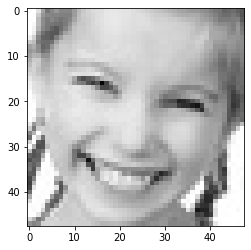

In [3]:
img  = cv2.imread('./FER_dataset/test/happy/PrivateTest_647018.jpg')
img.shape
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [4]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(48, 48)

In [5]:
faces = faceCascade.detectMultiScale(gray, 1.1,4)
for x,y,w,h in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h, x:x+w]
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("no face detected")
    else:
        print('ok')
        for (ex,ey,ew,eh) in facess:
            face_roi  = roi_color[ey:ey+eh,ex:ex+ew]

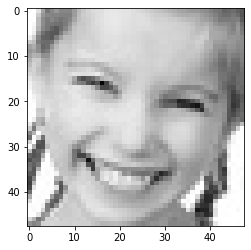

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
#plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [8]:
"""
final_img  = cv2.resize(face_roi, (48,48))
final_img = cv2.cvtColor(final_img, cv2.COLOR_RGB2GRAY)
plt.imshow(final_img)

final_img = img
final_img = np.expand_dims(final_img, axis = 0) 
#final_img = np.expand_dims(final_img, axis = 3)#add fourth dimension
final_img = final_img/255.0
"""
"""
Predictions = test.predict(final_img)
Predictions[0]
"""

'\nPredictions = test.predict(final_img)\nPredictions[0]\n'

In [9]:
img_size = 48
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = np.array(gray)
print("img", img.shape)
print("img_gray", img.shape)
X = np.array(img).reshape(-1,img_size,img_size,1)
X = X/255.0;
X.shape

img (48, 48)
img_gray (48, 48)


(1, 48, 48, 1)

In [10]:
Classes = ['angry','disgust','fear','happy','neutral','sad','surprise']
Predictions = test.predict(X)
print(Predictions)
ind = np.argmax(Predictions)
print(Classes[ind])

[[1.7390790e-03 1.6688280e-05 3.9933603e-03 9.3945080e-01 1.3513886e-02
  1.1323821e-03 4.0153801e-02]]
happy
